# Logistic regression with Python

For this lesson, we will be working with the [Kaggle Titanic Data Set] (https://www.kaggle.com/c/titanic). This is a very famous data set and is often the first step in Machine Learning!

We will try to assemble a surviving or deceased classification algorithm using Python logistic regression.

We'll use a "semi-clean" version of the Titanic dataset. If you use the dataset hosted directly on Kaggle, you might need to do an additional cleanup not shown on this notebook.

## Importing Libraries
Let's import some libraries to get you started!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


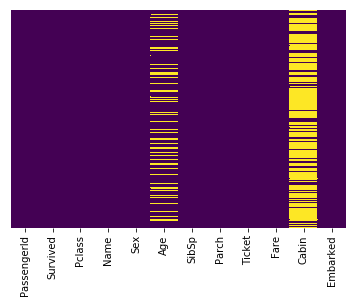

In [11]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
sns.set_style('whitegrid')

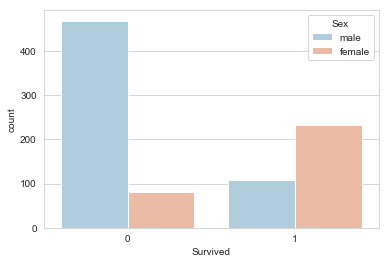

In [15]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

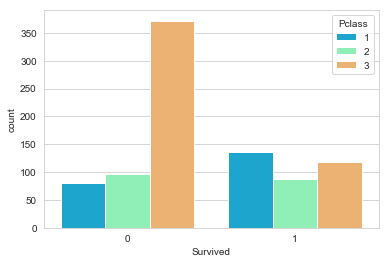

In [16]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

In [19]:
train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

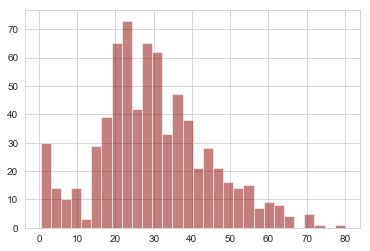

In [20]:
train['Age'].hist(bins=30, color='darkred', alpha=0.5)

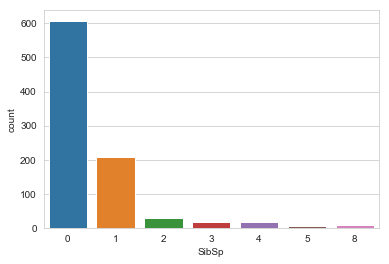

In [21]:
sns. countplot(x='SibSp', data=train)

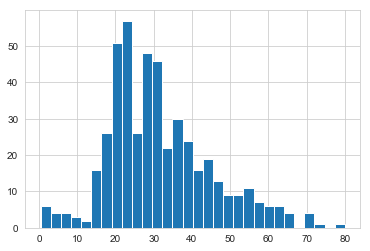

In [22]:
train[train['SibSp'] == 0]['Age'].hist(bins=30)

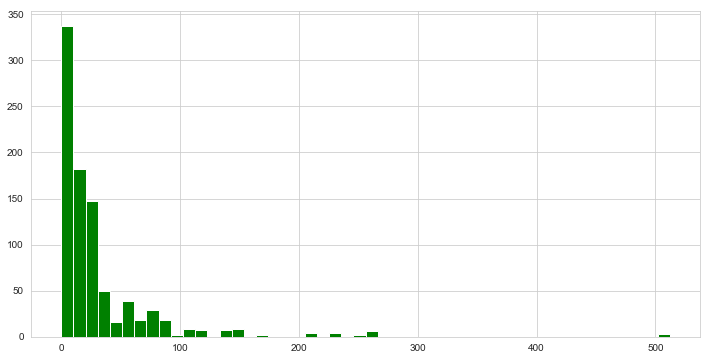

In [23]:
train['Fare'].hist(color='g', bins=50, figsize=(12, 6))

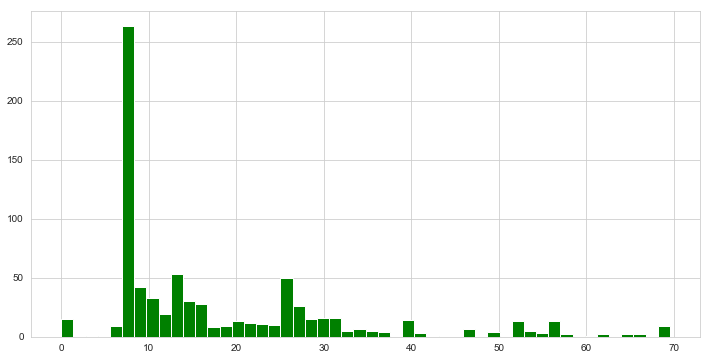

In [24]:
train[train['Fare']<70]['Fare'].hist(color='g', bins=50, figsize=(12, 6))

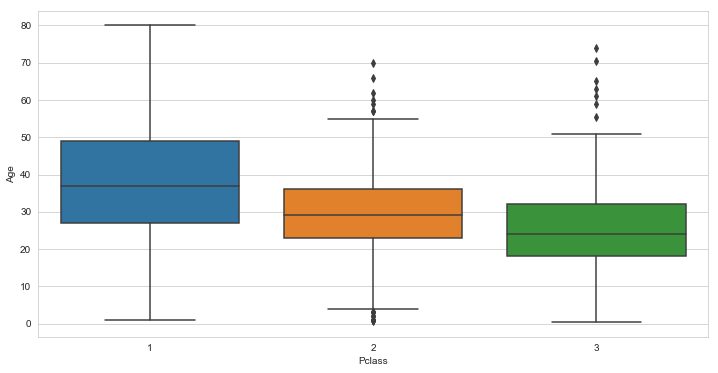

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=train)

In [27]:
# função de inutar dados faltantes na idade

In [33]:
def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [35]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1)

In [79]:
train['Age'].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     24.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    29.0
18    31.0
19    24.0
Name: Age, dtype: float64

In [37]:
# verificar se os dados foram preenchidos

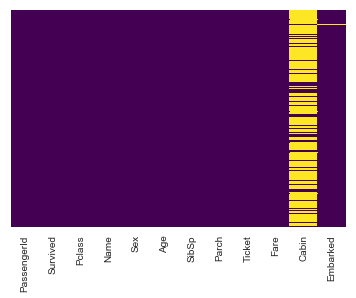

In [38]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [39]:
del train['Cabin']

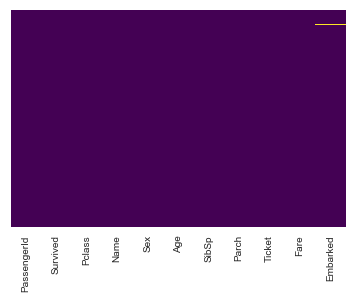

In [40]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [41]:
train.dropna(inplace=True)

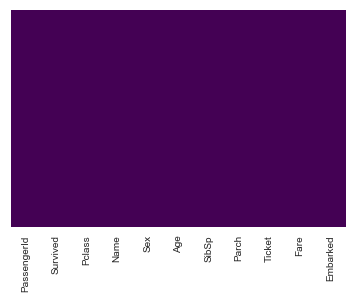

In [42]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [43]:
# não existem mais dados faltantes

In [47]:
pd.get_dummies(train['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [48]:
pd.get_dummies(train['Sex'], drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [49]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [51]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [54]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [56]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [57]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S


In [58]:
train = pd.concat([train, sex, embark], axis=1)

In [61]:
del train['Embarked']

In [62]:
train.head(30)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logmodel = LogisticRegression()

In [72]:
logmodel.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
prediction = logmodel.predict(X_test)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       163
           1       0.80      0.69      0.74       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



**According to the proposed model, if we obtain the information at the time of shipment to the Titanic, 81% sure that the person would die in the shipwreck.**

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
print(confusion_matrix(Y_test, prediction))

[[145  18]
 [ 32  72]]
